# Aprendizaje Automático y Big Data
## Práctica 1 : Regresión Lineal

Mario Quiñones Pérez y Guillermo García Patiño Lenza

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv

datos = read_csv("ex1data1.csv", header = None).astype(float).to_numpy()

In [3]:
def cost(hipotesis, datos_X, datos_Y):
    m = len(datos_X)
    estimacion = hipotesis(datos_X)
    error = estimacion - datos_Y
    v3 = sum(error**2)
    coste_def = (1/(2*m))*v3
    return coste_def

In [4]:
def calculaHipotesis(datos, alfa):
    X = datos[:,0]
    Y = datos[:,1]
    m = len(X)
    v0 = 0
    v1 = 0
    for i in range(1500):
        print("Para valores " + str(v0) + " y " + str(v1) + " el error es " + str(cost(lambda x : v0 + x*v1,X,Y)) + "\n")
        sum0 =  aplicaHipotesis(v0,v1,X) - Y
        sum1 = (aplicaHipotesis(v0,v1,X) - Y) * X
        v0 = v0 - (alfa/m) * sum(sum0)
        v1 = v1 - (alfa/m) * sum(sum1)
    return (v0,v1)

In [5]:
def aplicaHipotesis(v0,v1,X):
    return v0 + v1*X

In [6]:
def calculaHipotesis2(datos,alfa):
    X = datos[:,0]
    Y = datos[:,1]
    m = len(X)
    v0 = 0
    v1 = 0
    for _ in range(1500):
        sum0 = sum1 = 0
        print("Para valores " + str(v0) + " y " + str(v1) + " el error es " + str(cost(lambda x : v0 + x*v1,X,Y)) + "\n")
        for i in range(m):
            sum0 += (v0 + v1 * X[i]) - Y[i]
            sum1 += ((v0 + v1 * X[i]) - Y[i]) * X[i]
        v0 = v0 - (alfa/m) * sum0
        v1 = v1 - (alfa/m) * sum1
    return (v0,v1)

In [7]:
def graficasCoste(X, Y, rangoV0, rangoV1):
    paso = 0.1
    ArV0 = np.arange(rangoV0[0], rangoV1[1], paso)
    ArV1 = np.arange(rangoV1[0], rangoV1[1], paso)
    MatV0, MatV1 = np.meshgrid(ArV0, ArV1)
    Coste = np.empty_like(MatV0)
    for ix, iy in np.ndindex(MatV0.shape):
        Coste[ix, iy] = cost(lambda x : MatV0[ix, iy] + x * MatV1[ix,iy] ,X,Y)
    
    fig = plt.figure()
    ax = fig.gca(projection = '3d')
    ax.set_xlim(-10,10)
    ax.set_ylim(-1,4)
    surf = ax.plot_surface(MatV0,MatV1,Coste)
    plt.show()
    plt.figure()
    plt.contour(MatV0, MatV1, Coste, np.logspace(-10,10))
    plt.show()

In [8]:
def main1():
    datos = read_csv("ex1data1.csv", header = None).astype(float).to_numpy()
    params = calculaHipotesis(datos, 0.01)
    print("Mis parametros son " + str(params[0]) + " y " + str(params[1]) + "\n")
    X = datos[:,0]
    Y = datos[:,-1]
    min_X, max_X = min(X), max(X)
    min_Y = min_X * params[1] + params[0]
    max_Y = max_X * params[1] + params[0]
    plt.figure()
    plt.plot(X,Y,"x")
    plt.plot([min_X, max_X],[min_Y, max_Y])
    plt.show()
    plt.savefig("resultado.png")
    
    graficasCoste(X, Y, [-10,10], [-1,4])
    

Para valores 0 y 0 el error es 32.072733877455654

Para valores 0.0583913505154639 y 0.6532884974555674 el error es 6.737190464870008

Para valores 0.0628917527103938 y 0.7700097825599365 el error es 5.931593568604957

Para valores 0.05782292746142808 y 0.7913481156584673 el error es 5.901154707081387

Para valores 0.0510636251607781 y 0.795729810284954 el error es 5.895228586444221

Para valores 0.044014378365002556 y 0.7970961782721866 el error es 5.890094943117332

Para valores 0.036924131142162565 y 0.7979254732843951 el error es 5.885004158443646

Para valores 0.029837117577144787 y 0.7986582394519285 el error es 5.879932480491416

Para valores 0.022761181894038793 y 0.7993727912003019 el error es 5.874879094762575

Para valores 0.015697699574200093 y 0.8000830518518655 el error es 5.8698439118063845

Para valores 0.008646896228913493 y 0.8007914983590768 el error es 5.86482686531293

Para valores 0.0016087930989843232 y 0.8014985729280016 el error es 5.8598278899321805

Para valo

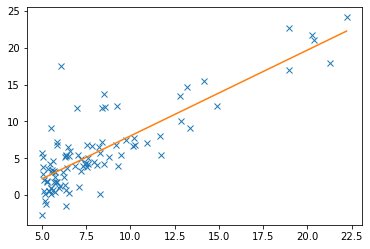

<Figure size 432x288 with 0 Axes>

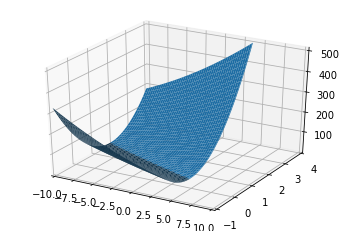

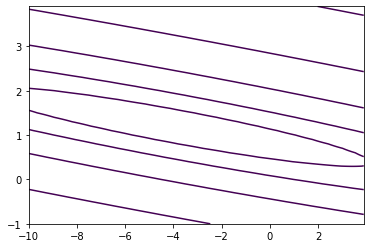

In [9]:
main1()

## Parte 2

In [83]:
datos2 = read_csv("ex1data2.csv", header = None).to_numpy().astype(float)
X = datos2[:,:-1]
Y = datos2[:,-1]
m = np.shape(X)[0]
n = np.shape(X)[1]

print(m)
print(n)

47
2


In [41]:
def normalizar(X):
    medias = X.mean(axis = 0)
    desv_tipicas = X.std(axis = 0)
    N = (X - medias) / desv_tipicas
    return (N, medias, desv_tipicas)

In [52]:
def cost_matrices(X,Y,Params):
    H = np.dot(X,Params)
    Aux = (H-Y) ** 2
    return Aux.sum()/(2*len(X))

In [78]:
def prepara_datos():
    datos = read_csv("ex1data2.csv", header = None).to_numpy().astype(float)
    
    X = datos[:, :-1]
    Y = datos[:, -1]
    
    m = np.shape(X)[0]
    
    N,med,desv = normalizar(X)
    N2 = np.hstack([np.ones( [m, 1 ] ) , N ] )
    
    return(N2,Y,med,desv)

In [54]:
def desc_gradiente(X,Y,alfa):
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    coste = np.zeros(1500)
    Params = np.zeros(n)
    for i in range(1500):
        coste[i] = cost_matrices(X,Y,Params)
        Params = calcula_Theta(X,Y,alfa,Params)
    return (Params,coste)

In [55]:
def calcula_Theta(X,Y,alfa,Params):
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    Nuevo_Param = np.zeros(n)
    coef = (alfa/m)
    Hip = np.dot(X, Params)
    Dif = Hip - Y
    for i in range(n):
        Nuevo_Param[i] = (- coef)* (Dif*X[:,i]).sum()
    return (Nuevo_Param + Params)

In [64]:
def main2():
    X,Y = prepara_datos()
    P1,c1 = desc_gradiente(X,Y,0.1)
    P2,c2 = desc_gradiente(X,Y,0.03)
    P3,c3 = desc_gradiente(X,Y,0.01)
    val_x = np.arange(0,1500,1)
    print(val_x)
    plt.figure()
    plt.plot(val_x,c1, c = 'blue' , label = ' alfa = 0.1 ')
    plt.plot(val_x,c2, c = 'red' , label = ' alfa = 0.03 ')
    plt.plot(val_x,c3, c = 'green', label = ' alfa = 0.01 ')
    plt.legend()
    plt.show()
    plt.savefig('coste_alfa.png')

[   0    1    2 ... 1497 1498 1499]


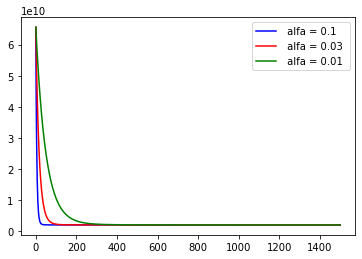

<Figure size 432x288 with 0 Axes>

In [65]:
main2()

In [71]:
def ecNormal(X,Y):
    p1 = np.linalg.pinv(np.dot(np.transpose(X), X))
    p2 = np.dot(np.transpose(X),Y)
    params = np.dot(p1,p2)
    return params

In [81]:
def main3():
    X1,Y1, med, desv = prepara_datos()
    P1,c1 = desc_gradiente(X1,Y1,0.1)
    
    datos = read_csv("ex1data2.csv", header = None).to_numpy().astype(float)
    X2 = datos[:, :-1]
    Y2 = datos[:, -1]
    P2 = ecNormal(X2,Y2)
    
    val0 = (1600 - med[0])/desv[0]
    val1 = (3 - med[1]) / desv[1]
   
    pred1 = (np.array([1 ,val0,val1]) * P1).sum()
    
    pred2 = (np.array([1600,3]) * P2).sum()
    
    print('con el desc de gradiente sale ' + str(pred1) + '\n')
    print('con la ecuacion normal sale ' + str(pred2) + '\n')

In [82]:
main3()

con el desc de gradiente sale 286120.93063401466

con la ecuacion normal sale 276312.3111145084

